# IDENTIFYING PNEUMONIA FROM X-RAY IMAGE USING TENSORFLOW

#### Analyzing a pneumonia x-ray image of normal lungs and pneumonia lungs. the dataset was downloaded from kaggle

## Import the neccessary library

In [27]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


## Loading of data

In [28]:
train_dataset = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = train_dataset.flow_from_directory(
    'data/train',
    target_size=(224, 224),  # Adjust the target size as needed
    batch_size=32,
    class_mode='binary'  # Use 'categorical' if you have more than two classes
)

test_dataset = ImageDataGenerator(rescale=1.0/255.0)



test_data = test_dataset.flow_from_directory(
    'data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


validation_data = test_dataset.flow_from_directory(
    'data/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Ploting normal image

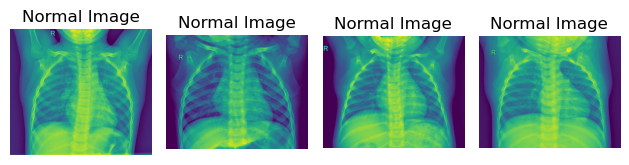

In [29]:
from matplotlib.image import imread

# Replace 'data/train' with the actual path to your train folder containing subfolders.
train_folder = 'data/train/normal'

# List all image files in the 'normal' subfolder
normal_images = [os.path.join(train_folder, filename) for filename in os.listdir(train_folder) if filename.endswith('.jpeg')]

# Define the number of images you want to display
num_images_to_display = 4

# Plot the selected number of images
for i in range(num_images_to_display):
    # Load and display the image
    img = imread(normal_images[i])
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title('Normal Image')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Ploting x-ray with Pneumonia

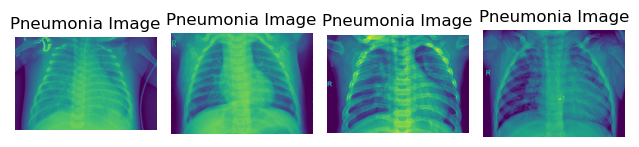

In [30]:
# Replace 'data/train' with the actual path to your train folder containing subfolders.
train_folder = 'data/train/pneumonia'

# List all image files in the 'normal' subfolder
normal_images = [os.path.join(train_folder, filename) for filename in os.listdir(train_folder) if filename.endswith('.jpeg')]

# Define the number of images you want to display
num_images_to_display = 4

# Plot the selected number of images
for i in range(num_images_to_display):
    # Load and display the image
    img = imread(normal_images[i])
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title('Pneumonia Image')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Building model

In [31]:
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' if you have more than two classes
])
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000002386A9A3D30>>

## Model compilation

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Model training 

In [33]:
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_data,
    validation_steps=len(validation_data)
)


Epoch 1/10
163/163 [==============================] - 366s 2s/step - loss: 0.4651 - accuracy: 0.7719 - val_loss: 0.5940 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 364s 2s/step - loss: 0.3561 - accuracy: 0.8301 - val_loss: 0.5209 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 371s 2s/step - loss: 0.2946 - accuracy: 0.8712 - val_loss: 0.6996 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 381s 2s/step - loss: 0.2605 - accuracy: 0.8932 - val_loss: 0.7144 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 367s 2s/step - loss: 0.2487 - accuracy: 0.8953 - val_loss: 0.8332 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 363s 2s/step - loss: 0.2396 - accuracy: 0.9018 - val_loss: 0.3779 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 362s 2s/step - loss: 0.2184 - accuracy: 0.9038 - val_loss: 0.8447 - val_accuracy: 0.6875

## Evaluate the model

In [35]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


20/20 [==============================] - 14s 698ms/step - loss: 0.6736 - accuracy: 0.7580
Test Loss: 0.6736067533493042
Test Accuracy: 0.7580128312110901


## Save the model

In [38]:
model.save('pneumonia_detection_model')


INFO:tensorflow:Assets written to: pneumonia_detection_model\assets


INFO:tensorflow:Assets written to: pneumonia_detection_model\assets


## Make some prediction

In [40]:
# Make predictions on the test data generator
predictions = model.predict(test_data)

# Assuming it's binary classification (normal or pneumonia)
predicted_labels = [1 if prediction > 0.5 else 0 for prediction in predictions]

# Get the true labels of the test data
true_labels = []
for i in range(len(test_generator.filenames)):
    filename = test_generator.filenames[i]
    label = 1 if "pneumonia" in filename else 0  # Adjust based on your folder structure
    true_labels.append(label)

# Display the predicted and true labels
for i in range(len(true_labels)):
    print(f"Predicted: {'Pneumonia' if predicted_labels[i] == 1 else 'Normal'} | True: {'Pneumonia' if true_labels[i] == 1 else 'Normal'}")



20/20 [==============================] - 24s 1s/step
Predicted: Normal | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Normal | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Normal | True: Normal
Predicted: Normal | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Normal | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Normal | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: Normal
Predicted: Pneumonia | True: 